In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split as tst
from sklearn.preprocessing import StandardScaler as ss
import tensorflow as tf

In [26]:
ir=datasets.load_iris()

In [27]:
datadf=pd.DataFrame(data=ir.data,columns=ir.feature_names)
targetdf=pd.DataFrame(data=ir.target,columns=['target'])

In [28]:
df=pd.concat([datadf,targetdf],axis=1)

In [37]:
print(df.head())
print('\nshape: ',df.shape)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

shape:  (150, 5)


In [30]:
x,y=df.drop('target',axis=1),df['target']

In [31]:
x_train,x_test,y_train,y_test=tst(x,y,test_size=0.2,random_state=42)

In [39]:
#standardized/scaling
sc=ss()

x_trainsc=sc.fit_transform(x_train)
x_testsc=sc.transform(x_test)

In [43]:
m=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_trainsc.shape[1],)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [45]:
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [46]:
history=m.fit(x_trainsc,y_train,epochs=50,batch_size=32,validation_split=0.1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3819 - loss: 1.0855 - val_accuracy: 0.5000 - val_loss: 1.0606
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6578 - loss: 1.0065 - val_accuracy: 0.7500 - val_loss: 1.0209
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6714 - loss: 0.9274 - val_accuracy: 0.7500 - val_loss: 0.9842
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6975 - loss: 0.8579 - val_accuracy: 0.7500 - val_loss: 0.9497
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6517 - loss: 0.8471 - val_accuracy: 0.6667 - val_loss: 0.9185
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6696 - loss: 0.7858 - val_accuracy: 0.6667 - val_loss: 0.8857
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6916 - loss: 0.7352 - val_accuracy: 0.6667 - val_loss: 0.8533
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7677 - loss: 0.6653 - val_accuracy: 0.6667 - val_loss: 0.8190
Epoc

In [47]:
loss,accuracy=m.evaluate(x_testsc,y_test)
print(f'test accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0854
test accuracy: 1.0


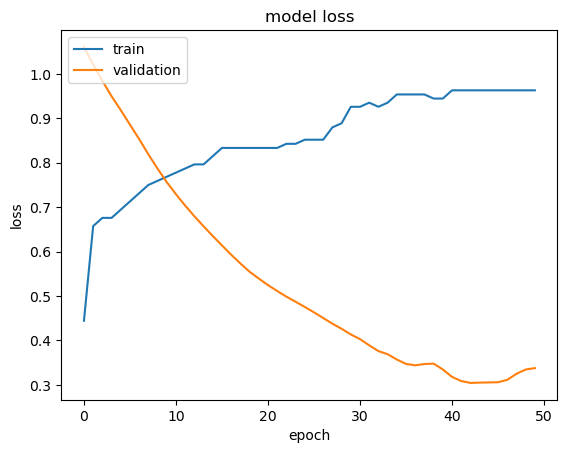

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()